<a href="https://colab.research.google.com/github/simandi2877/eva/blob/master/Project9v1/Assignment_9v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 9



In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


Get the cifar dataset

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
print (num_classes)

10


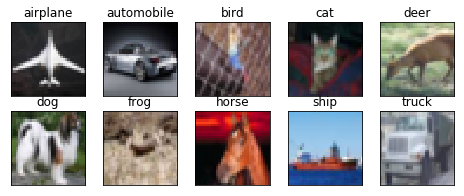

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

Define the model without dense layers

In [7]:
# Define the model
model = Sequential()
#When 3x3 convolutions are used, Receptive field = (2**(i+1) − 1)×(2**(i+1) − 1) where i is the dilation rate.

model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3))) #30
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(64, 3, 3, activation='relu')) #28
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(64, 3, 3, activation='relu')) #26
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(64, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(64, 3, 3, activation='relu')) #22
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2))) #11
model.add(Dropout(0.2))

model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu')) #9
model.add(BatchNormalization())
model.add(Dropout(0.2))

#model.add(SeparableConv2D(64, 3, 3, activation='relu', border_mode='same' )) #9
#model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2))) #5
model.add(Dropout(0.25))

model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu')) #3
model.add(BatchNormalization())
model.add(Dropout(0.2))


#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))


#model.add(Convolution2D(128, 1,1, activation='relu', border_mode='same'))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

from keras.callbacks import LearningRateScheduler
import math
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator
import os
import math
from keras.callbacks import ModelCheckpoint

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p modelstore
!google-drive-ocamlfuse modelstore
!ls /content/modelstore
!cd modelstore

filepath="modelstore/weights-assign9-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint_dir = os.path.dirname(filepath)
!ls {checkpoint_dir}
print( os.getcwd() )
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')



W0630 02:16:36.734429 140347362641792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  after removing the cwd from sys.path.
W0630 02:16:36.750379 140347362641792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 02:16:36.753240 140347362641792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0630 02:16:36.781359 140347362641792 deprecation_wrapper.py:119] From /u

E: Package 'python-software-properties' has no installation candidate
··········
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
'cat - Copy.jpg'
'Colab Notebooks'
 EIPImandi
 EIPSessions
 EVA
 EVA_S1.ipynb
 fox.png
'Getting started'
 installKeras.ipynb
 modelstore
 mountdrive.ipynb
'Sleep latency vs respiratory rate 2019-02-19 14.38.01.png'
 Untitled0.ipynb
 weights-assign9-01-0.4759.hdf5
 weights-assign9-02-0.5758.hdf5
 weights-assign9-03-0.5775.hdf5
 weights-assign9-04-0.6657.hdf5
 weights-assign9-06-0.7225.hdf5
 weights-assign9-07-0.7340.hdf5
 weights-assign9-08-0.7388.hdf5
 weights-assign9-09-0.7644.hdf5
 weights-assign9-100-0.8597.hdf5
 weights-assign9-11-0.7743.hdf5
 weights-assign9-13-0.7779.hdf5
 weights-assign9-15-0.7876.hdf5
 weights-assign9-17-0.7997.hdf5
 weights-assign9-20-0.8052.hdf5
 weights-assign9-23-0.8058.hdf5
 weights-assign9-25-0.8126.hdf5
 weights-assign9-30-0.8250.hdf5
 weights-assign9-36-0.8275.hdf5
 weights-ass

In [8]:
model.summary()
print(train_features.shape[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 64)        0         
__________

Train the network with poor mans data augmentation and no cutout.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=390, validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., epochs=100)`
  if sys.path[0] == '':


Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 23s 59ms/step - loss: 1.6820 - acc: 0.4029 - val_loss: 1.4460 - val_acc: 0.4759

Epoch 00001: val_acc improved from -inf to 0.47590, saving model to modelstore/weights-assign9-01-0.4759.hdf5
Epoch 2/100
390/390 [==============================] - 21s 54ms/step - loss: 1.2295 - acc: 0.5607 - val_loss: 1.1920 - val_acc: 0.5758

Epoch 00002: val_acc improved from 0.47590 to 0.57580, saving model to modelstore/weights-assign9-02-0.5758.hdf5
Epoch 3/100
390/390 [==============================] - 21s 53ms/step - loss: 1.0394 - acc: 0.6350 - val_loss: 1.2408 - val_acc: 0.5775

Epoch 00003: val_acc improved from 0.57580 to 0.57750, saving model to modelstore/weights-assign9-03-0.5775.hdf5
Epoch 4/100
390/390 [==============================] - 21s 53ms/step - loss: 0.9140 - acc: 0.6767 - val_loss: 0.9791 - val_acc: 0.6657

Epoch 00004: val_acc improved from 0.57750 to 0.66570, saving model to modelstore/weights-assign9-04-0.6657.hdf5
Epoch 5/100
390/390

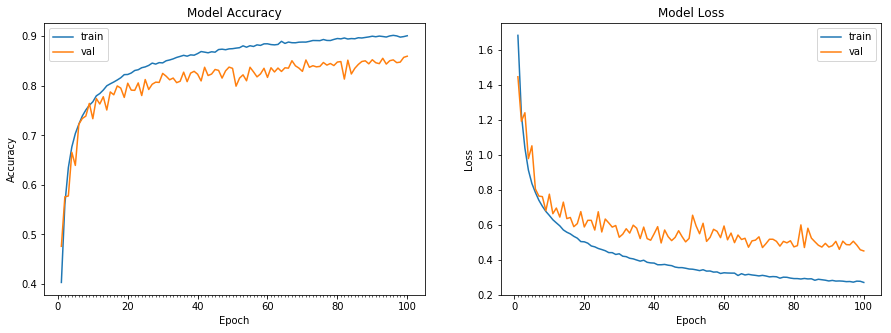

Accuracy on test data is: 85.97


In [0]:


datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False, featurewise_center=True, featurewise_std_normalization=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], steps_per_epoch=128, nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Load the weights with 85%.97 validation accuracy from google drive. 

Predict the images and generate the heat map with gradcam

W0630 02:18:09.191376 140347362641792 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

5
(?, 11, 11, 64)
(64,)
(11, 11, 64)
(11, 11)


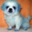

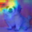

0
(?, 11, 11, 64)
(64,)
(11, 11, 64)
(11, 11)


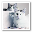

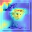

9
(?, 11, 11, 64)
(64,)
(11, 11, 64)
(11, 11)


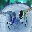

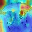

2
(?, 11, 11, 64)
(64,)
(11, 11, 64)
(11, 11)


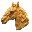

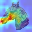

In [9]:
!pip install -U -q PyDrive ## you will have install for every colab session
import cv2
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#https://drive.google.com/open?id=1MdOVBUQoTiEl1WcOE9v7moWTcbEDeLEB is the shareable link of the weights files in google drive.
  
hdf5file = drive.CreateFile({'id':'1MdOVBUQoTiEl1WcOE9v7moWTcbEDeLEB'})
hdf5file.GetContentFile('weights.hdf5')

model.load_weights('weights.hdf5')

from skimage import io

def gradcam(url):
  input_image = io.imread(url)

  input_image = cv2.resize(input_image, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
  x = image.img_to_array(input_image)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  print(class_idx)
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_6")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  print(grads.shape)
  pooled_grads = K.mean(grads, axis=(0,1,2))
  print(pooled_grads.shape)
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])
  #print(pooled_grads_value)
  #print(conv_layer_output_value)

  for i in range(9):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis = -1)
  print(conv_layer_output_value.shape)
  print(heatmap.shape)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (input_image.shape[1], input_image.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(input_image, 0.5, heatmap, 0.5, 0)
  from google.colab.patches import cv2_imshow
  cv2_imshow( input_image)
  cv2_imshow(superimposed_img)

dog = "https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog4.png"
cat = "https://s7d1.scene7.com/is/image/PETCO/canidae-life-stages-071116-img-224x224-premium-ingredients-d"
bird = "https://cdn11.bigcommerce.com/s-f7wefk0y/images/stencil/1280x1280/products/5574/11822/birds__10016.1433870554.jpg?c=2&imbypass=on"
horse = "https://cdn11.bigcommerce.com/s-f7wefk0y/images/stencil/500x500/products/6314/14145/ws103__09613.1450122713.jpg?c=2&imbypass=on"
gradcam(dog)
gradcam(cat)
gradcam(bird)
gradcam(horse)

Functiong to have the cutout image augmentation over the images

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

Train the model with cutout augmentation in place.

'cat - Copy.jpg'
'Colab Notebooks'
 EIPImandi
 EIPSessions
 EVA
 EVA_S1.ipynb
 fox.png
'Getting started'
 installKeras.ipynb
 modelstore
 mountdrive.ipynb
'Sleep latency vs respiratory rate 2019-02-19 14.38.01.png'
 Untitled0.ipynb
 weights-assign9-01-0.4759.hdf5
 weights-assign9-02-0.5758.hdf5
 weights-assign9-03-0.5775.hdf5
 weights-assign9-04-0.6657.hdf5
 weights-assign9-06-0.7225.hdf5
 weights-assign9-07-0.7340.hdf5
 weights-assign9-08-0.7388.hdf5
 weights-assign9-09-0.7644.hdf5
 weights-assign9-100-0.8597.hdf5
 weights-assign9-11-0.7743.hdf5
 weights-assign9-13-0.7779.hdf5
 weights-assign9-15-0.7876.hdf5
 weights-assign9-17-0.7997.hdf5
 weights-assign9-20-0.8052.hdf5
 weights-assign9-23-0.8058.hdf5
 weights-assign9-25-0.8126.hdf5
 weights-assign9-30-0.8250.hdf5
 weights-assign9-36-0.8275.hdf5
 weights-assign9-39-0.8292.hdf5
 weights-assign9-42-0.8374.hdf5
 weights-assign9-49-0.8377.hdf5
 weights-assign9-67-0.8506.hdf5
 weights-assign9-71-0.8521.hdf5
 weights-assign9-90-0.8526.hdf5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=390, validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., epochs=100)`
W0630 02:18:46.868057 140347362641792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a futur

/content
Epoch 1/100
390/390 [==============================] - 28s 72ms/step - loss: 0.7591 - acc: 0.7437 - val_loss: 0.5417 - val_acc: 0.8177

Epoch 00001: val_acc improved from -inf to 0.81770, saving model to modelstore/weights-assign9v1-cutout-01-0.8177.hdf5
Epoch 2/100
390/390 [==============================] - 26s 68ms/step - loss: 0.6673 - acc: 0.7684 - val_loss: 0.5420 - val_acc: 0.8184

Epoch 00002: val_acc improved from 0.81770 to 0.81840, saving model to modelstore/weights-assign9v1-cutout-02-0.8184.hdf5
Epoch 3/100
390/390 [==============================] - 26s 67ms/step - loss: 0.6489 - acc: 0.7729 - val_loss: 0.5704 - val_acc: 0.8072

Epoch 00003: val_acc did not improve from 0.81840
Epoch 4/100
390/390 [==============================] - 26s 67ms/step - loss: 0.6387 - acc: 0.7757 - val_loss: 0.4818 - val_acc: 0.8369

Epoch 00004: val_acc improved from 0.81840 to 0.83690, saving model to modelstore/weights-assign9v1-cutout-04-0.8369.hdf5
Epoch 5/100
390/390 [=============

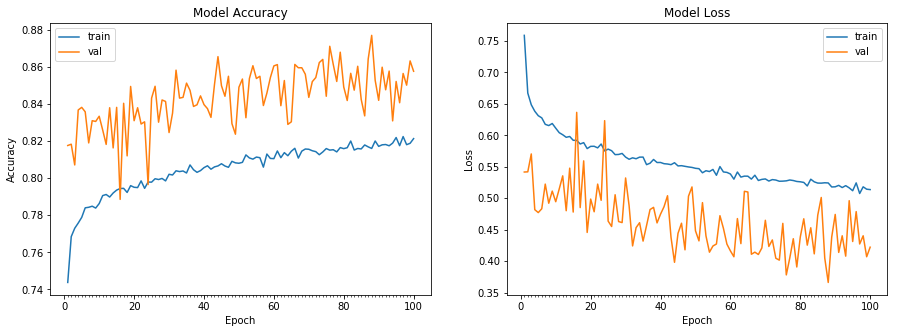

Accuracy on test data is: 85.78


In [11]:
filepath="modelstore/weights-assign9v1-cutout-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint_dir = os.path.dirname(filepath)
!ls {checkpoint_dir}
print( os.getcwd() )
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))

#datagen.fit(train_features)
start = time.time()

model_info =model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], steps_per_epoch=128, nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Predict the images after the cutout trained model with best weights. 

The accuracy has increased to 87.72% with cutout compared to 85.9% witout cutout. The increase is logarthmic proportional.

0
(?, 11, 11, 64)
(64,)
(11, 11, 64)
(11, 11)


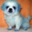

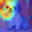

0
(?, 11, 11, 64)
(64,)
(11, 11, 64)
(11, 11)


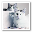

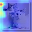

0
(?, 11, 11, 64)
(64,)
(11, 11, 64)
(11, 11)


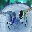

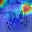

1
(?, 11, 11, 64)
(64,)
(11, 11, 64)
(11, 11)


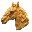

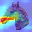

In [12]:
#https://drive.google.com/open?id=1a_I57oUZFVG1zRco27070zRo_4IQ_eIt is the 87.72% accuarcy weights after cutout.
  
hdf5file = drive.CreateFile({'id':'1a_I57oUZFVG1zRco27070zRo_4IQ_eIt'})
hdf5file.GetContentFile('weights-coutout.hdf5')

model.load_weights('weights-coutout.hdf5')
dog = "https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog4.png"
cat = "https://s7d1.scene7.com/is/image/PETCO/canidae-life-stages-071116-img-224x224-premium-ingredients-d"
bird = "https://cdn11.bigcommerce.com/s-f7wefk0y/images/stencil/1280x1280/products/5574/11822/birds__10016.1433870554.jpg?c=2&imbypass=on"
horse = "https://cdn11.bigcommerce.com/s-f7wefk0y/images/stencil/500x500/products/6314/14145/ws103__09613.1450122713.jpg?c=2&imbypass=on"
gradcam(dog)
gradcam(cat)
gradcam(bird)
gradcam(horse)